In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.sankey import Sankey
from numpy.random import multivariate_normal
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
import datetime
from matplotlib import rcParams
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
import matplotlib.dates as dates
import time
import seaborn as sns
import seaborn.objects as so
import matplotlib.cbook as cbook

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
# pd.options.display.precision = 2

In [ ]:
imgw = r"C:\python\function\testfile\seaborn_guidline.PNG"    #使用下面这种形式,只能给绝对路径

with cbook.get_sample_data(imgw) as im_file:
    im = plt.imread(im_file)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.imshow(im)

In [ ]:
img = r"..\testfile\seaborn_variance.PNG"

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
im = plt.imread(img)
ax.imshow(im)

In [ ]:
dtpath = r"..\testfile\mc03test.csv"
dt = pd.read_csv(dtpath,index_col=0,parse_dates=True)
dt["hour"] = dt.index.strftime("%Y-%m-%d %H")
dt.head(1)

In [ ]:
snspath = r"..\testfile\snstestdata.csv"
snsdata = pd.read_csv(snspath,index_col=0)
snsdata.head(1)

In [ ]:
sns.utils.get_data_home()

In [ ]:
sns.get_dataset_names()

In [8]:
penguins = sns.load_dataset("penguins")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

In [ ]:
# penguins

# 相关性绘图 Relational plots

## relplot:关系图

In [ ]:
sns.relplot(data=dt,
            x="PmNormRate_1",    #第一个维度
            y="TotalCounts_1",   #第二个维度
            hue="FacilityNr",    #第三个维度
            style="PmTrayId",    #第四个维度,用形状区分
#             size="day",          #第五个维度,点的大小,线条的粗细区分
            hue_order=["CN-100340","CN-100341","CN-100342"],     #定义图例中的属性
            col="day",           #第六个维度
#             row="PmTrayId",    #第七个维度
            col_wrap=2,
#             palette=["r","green","blue"],    #自定义颜色
            kind="scatter",      #图形类型,default: scatter; 可选:line,
            
            
           )

In [ ]:
sns.relplot(data=dt,
           x="Omega",
           y="GainArzMc_2p5",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            units="PmTrayId",
            marker="s",
           )

In [ ]:
dt.drop_duplicates("StartDateTime",inplace=True)
sns.relplot(data=dt,
           x="StartDateTime",
           y="ZeroInterceptPM2p5NumbConcRef_1",
            kind='line',
            
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            height=8,     #axes的高度;
            aspect=2,     #height*aspect = width
            marker="o",

           
           )
plt.tick_params(labelrotation=45)
plt.xticks("")

In [ ]:
# fig = plt.figure(figsize=(14,8))
# ax = fig.add_subplot()
sns.relplot(data=dt,
           x="Omega",
           y="GainArzMc_2p5",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            markers=["s","h",">"],
            legend="auto",
            kind="scatter",

           )

## scatterplot:绘制关系型散点图

## lineplot: 线型关系图

In [ ]:
sns.lineplot(data=dt,x="Omega",y="GainArzMc_2p5",
             hue="FacilityNr",
             sort=True,          #
            )

# 分布图 Distribution plots

## displot:

In [ ]:
sns.displot(data=dt,
           x="Omega",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
           alpha=0.3,
            
           )

In [ ]:
sns.displot(data=dt,
           x="Omega",
           kde=True,
#             hist=True,
           )
plt.axvline(0.765,c='r')
plt.axvline(0.89,c='r')

## histplot:

In [ ]:
sns.histplot(data=snsdata,
            x="Omega",
             stat="count",
             kde=True,
            )

## kdeplot: 核密度估计图

In [ ]:
dt.head(2)

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",ax=ax,
#            common_norm=True,
           )

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,y="Omega",ax=ax)

In [ ]:
iris = dt[["ZeroInterceptPM2p5NumbConcRef_1","ZeroInterceptPM2p5NumbConcRef_2"]]
sns.kdeplot(data=iris)   #绘制所有列

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
           bw_adjust=0.2,   #曲线的光滑度  
            cut=0,        #Use more smoothing, but don’t smooth past the extreme data points:
           )

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
           bw_adjust=0.2,   #曲线的光滑度  
            cut=0,        #Use more smoothing, but don’t smooth past the extreme data points:
            multiple="stack",     #填充样式 {“layer”, “stack”, “fill”}
           )

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

# 堆积分布:
sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
#             cumulative=True,
            common_norm=False,
            common_grid=True,
            
           )

In [ ]:
tips_agg = (tips.groupby("size").agg(total_bill=("total_bill", "mean"), n=("total_bill", "count")))

In [ ]:
dt.head(2)

In [ ]:
dt_agg = dt.groupby("FacilityNr").agg(omega_m = ("Omega","mean"), n=("Omega","count"))

In [ ]:
dt_agg

In [ ]:
sns.kdeplot(data=dt_agg,
            x="omega_m",
            weights="n",    #权重
           )

In [ ]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            log_scale=True,
           )

In [ ]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            hue="FacilityNr",
            fill=True,
            common_norm=False,    #True: 每一个density总量记为1;False: 所有density总量记为1
            palette="crest",      #多个density颜色
            alpha=0.5,
            linewidth=0,          #density边线
           )

In [ ]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            y="Omega",
            hue="FacilityNr",
            fill=True,
           )

In [ ]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            y="Omega",
#             hue="FacilityNr",
            fill=True,
            cmap="mako",
            thresh=0,levels=100,
           )

## ecdfplot:累积分布图

In [ ]:
sns.ecdfplot(data=dt,x="Omega")   #x,y如果不指定,默认会将所有列进行展示

In [ ]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr"
            
            )

In [ ]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr",
             stat="count"     #默认的分布统计信息已标准化以显示比例，但是您可以显示绝对计数
            
            )

In [ ]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr",
             stat="count",
             complementary=True,   #也可以绘制经验互补CDF(1-CDF)
            
            )

## rugplot:

In [ ]:
sns.set_theme()

# sns.kdeplot(data=dt,x="Omega")
sns.rugplot(data=dt,x="Omega",hue="FacilityNr",height=0.4)

# 分类统计图

## catplot: 分类型数据绘图

### Categorical scatterplots

In [ ]:
sns.catplot(data=dt,kind="swarm",x="Omega")

In [ ]:
sns.catplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
            kind="strip",
            y="Omega",
            x="StartDateTime",   #加这个参数会很慢
            hue="FacilityNr",
            height=6,
            aspect=1.5
           )
plt.tick_params(labelrotation=45)

### Categorical distribution plots: 
    "box":"boxplot"; 
    "violin": "violinplot"
    "boxen": "boxen"

In [ ]:
sns.catplot(data=dt.reset_index().head(100),
           kind="box",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=1.5
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

In [ ]:
sns.catplot(data=dt.reset_index().head(100),
           kind="violin",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

In [ ]:
sns.catplot(data=dt.reset_index().head(100),
           kind="boxen",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=1.5
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

### Categrorical estimate plots:
    "point": "pointplot"
    "bar": "barplot"
    "count": "countplot"

In [ ]:
sns.catplot(data=snsdata[snsdata["Omega"].notna()].reset_index().head(1000),
           kind="point",
           x="StartDateTime",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           estimator=np.mean
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以
plt.axhline(0.89,c='r')
plt.axhline(0.765,c='r')

In [ ]:
sns.catplot(data=snsdata[snsdata["Omega"].notna()].reset_index().head(1000),
           kind="point",
           x="StartDateTime",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           estimator=np.max
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以
plt.axhline(0.89,c='r')
plt.axhline(0.765,c='r')

In [ ]:

sns.catplot(data=dt.reset_index().head(100),
           kind="count",
           x="hour",
#            y="PostCleanPm10P0NumbConcMean_2",
           hue="FacilityNr",
#             saturation=0.5,
            ci=None,           #是否有胡须
            height=6,
            aspect=2
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

In [ ]:
sns.catplot(data=snsdata[snsdata["Omega"].notna()].reset_index(),
           kind="count",
           x="FacilityNr",
#            y="Omega",
#            hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

## stripplot

In [ ]:
snsdata.head(2)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
#              x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              ax=ax
             )
# plt.tick_params(labelrotation=45)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              
              ax=ax
             )
plt.tick_params(labelrotation=45)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              ax=ax
             )
plt.tick_params(labelrotation=45)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              
              marker="x",     #marker 相关的见marker属性
              size=5,      #marker size
#               color="b",
              edgecolor="r",   #marker edge color
              linewidth=1,     #marker edge linewidth
              alpha=0.5,
              
              palette="Set2",
              ax=ax,
             )
plt.tick_params(labelrotation=45)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax = sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              
              marker="x",     #marker 相关的见marker属性
              size=5,      #marker size
#               color="b",
              edgecolor="r",   #marker edge color
              linewidth=1,     #marker edge linewidth
              alpha=0.5,
              
              palette="Set2",
              ax=ax,
             )
plt.tick_params(labelrotation=45)
ax.set_title("Omega distribution",fontsize=16)

In [ ]:
sns.boxplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
           x="StartDateTime",
           y="Omega",
            hue="FacilityNr"
            )
sns.stripplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
             x="StartDateTime",
             y="Omega",
             hue="FacilityNr")
plt.tick_params(labelrotation=45)


In [ ]:
sns.violinplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
           x="StartDateTime",
           y="Omega",
            hue="FacilityNr"
            )
sns.stripplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
             x="StartDateTime",
             y="Omega",
             hue="FacilityNr")
plt.tick_params(labelrotation=45)

## swarmplot:

In [ ]:
snsdata.head(2)

In [ ]:
# 画一个简单的蜂群图
ax = sns.swarmplot(data=snsdata.head(500),
                  x = "Omega")

In [ ]:
# 对蜂群进行分组:
ax = sns.swarmplot(data=snsdata.head(500).reset_index(),
                  x="StartDateTime",
                  y = "Omega",
                  hue="FacilityNr",
#                    dodge=True,      #比如两台设备的数据是统一时间点的,True:把同一时间点的数据分为两组
                  hue_order = ["CN-100340","CN-100342"],
                   
#                    marker相关参数
                   size=8,
                   marker='D'
                  )
plt.tick_params(labelrotation=45,axis='x')

In [ ]:
ax = sns.boxplot(data=snsdata.head(500).reset_index(),
                x="StartDateTime",
                y="Omega")
ax = sns.swarmplot(data=snsdata.head(500).reset_index(),
                 x="StartDateTime",
                 y = "Omega",
                 
                 )

## boxplot:

In [ ]:
ax = sns.boxplot(data=snsdata.reset_index().head(800),
                x="StartDateTime",
                y="Omega",
                hue="FacilityNr",
                 palette="Set3",

                )
ax.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

In [ ]:
ax = sns.boxplot(data=snsdata.reset_index().head(800),
                x="FacilityNr",
                y="Omega",
                 palette="Set3",
                 order=["CN-100340","CN-100342"],

                )
ax.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

In [ ]:
ax = sns.boxplot(data=snsdata.reset_index().head(800)["Omega"],

                 orient="v",
                 palette="Set3",

                )
ax.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

In [ ]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(211)
axsns = sns.boxplot(data=dt.reset_index(),
                x="day",
                y="Omega",
                 hue="FacilityNr",
                 palette="Set3",
                 hue_order=["CN-100340","CN-100342"],
                 dodge=False,
                 ax = ax1,

                )
ax1.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)


ax2 = fig.add_subplot(212)
axsns = sns.boxplot(data=dt.reset_index(),
                x="day",
                y="Omega",
                 hue="FacilityNr",
                 palette="Set3",
                 hue_order=["CN-100340","CN-100342"],
                 dodge=True,  #default:True,比如两台设备的数据是统一时间点的,True:把同一时间点的数据分为两组
                 ax = ax2,

                )
ax2.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

plt.tight_layout()


## boxenplot

In [4]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


<Axes: xlabel='sex', ylabel='bill_length_mm'>

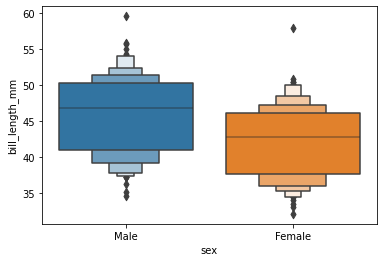

In [7]:
sns.boxenplot(data=penguins,
              x="sex",
              y="bill_length_mm",
             )

## violinplot:小提琴图

In [ ]:
ax = sns.violinplot(data=snsdata,
              x = "FacilityNr",
              # order=["CN-100340","CN-100341","CN-100342"],
              y="KclHyp_0",
               
               hue="day",
               paleete="husl",
               split=True,      #只有hue是两组数据的时候有效
               inner="quartile",   #“box”, “quartile”, “point”, “stick”, None
               scale="count",      #如何决定 plot的宽度,
                scale_hue=True,    #Scale the density relative to the counts across all bins:
             )

In [ ]:
snsdata.head(2)

In [ ]:
snsdata.day.unique()

## pointplot

<Axes: xlabel='sex', ylabel='survived'>

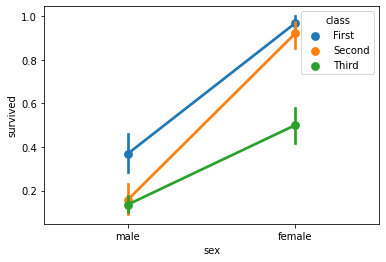

In [9]:
sns.pointplot(data=titanic,x="sex", y="survived", hue="class")

In [10]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 分布+关系

## jointplot

In [12]:
sns.set()

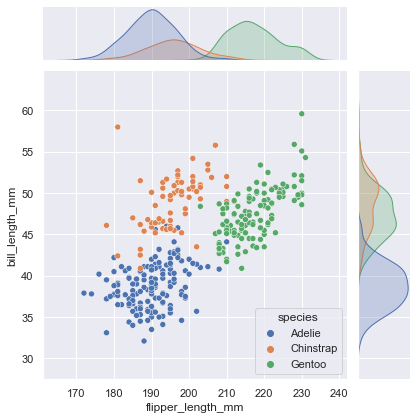

In [13]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

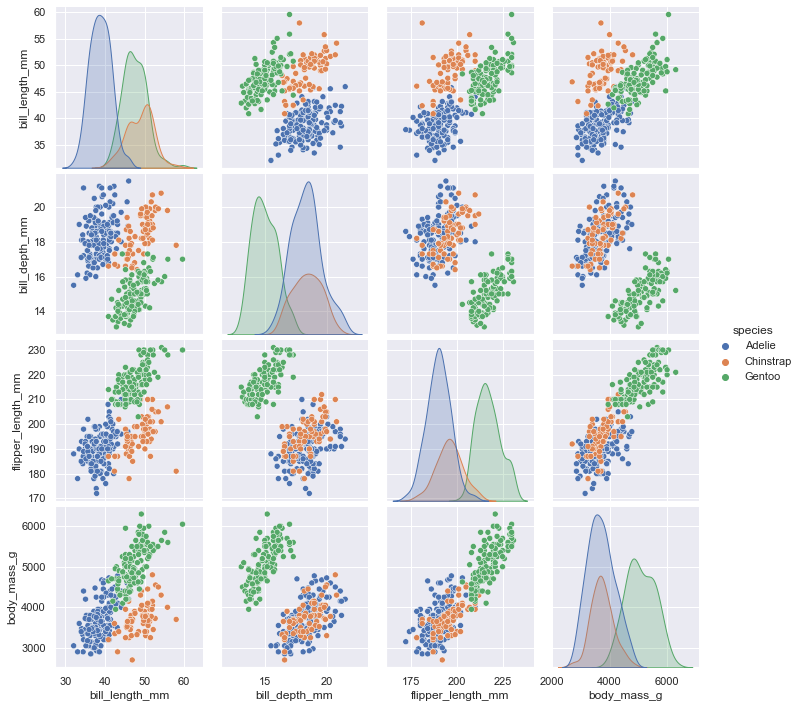

In [14]:
sns.pairplot(data=penguins,hue="species")

In [15]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


In [16]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

# test

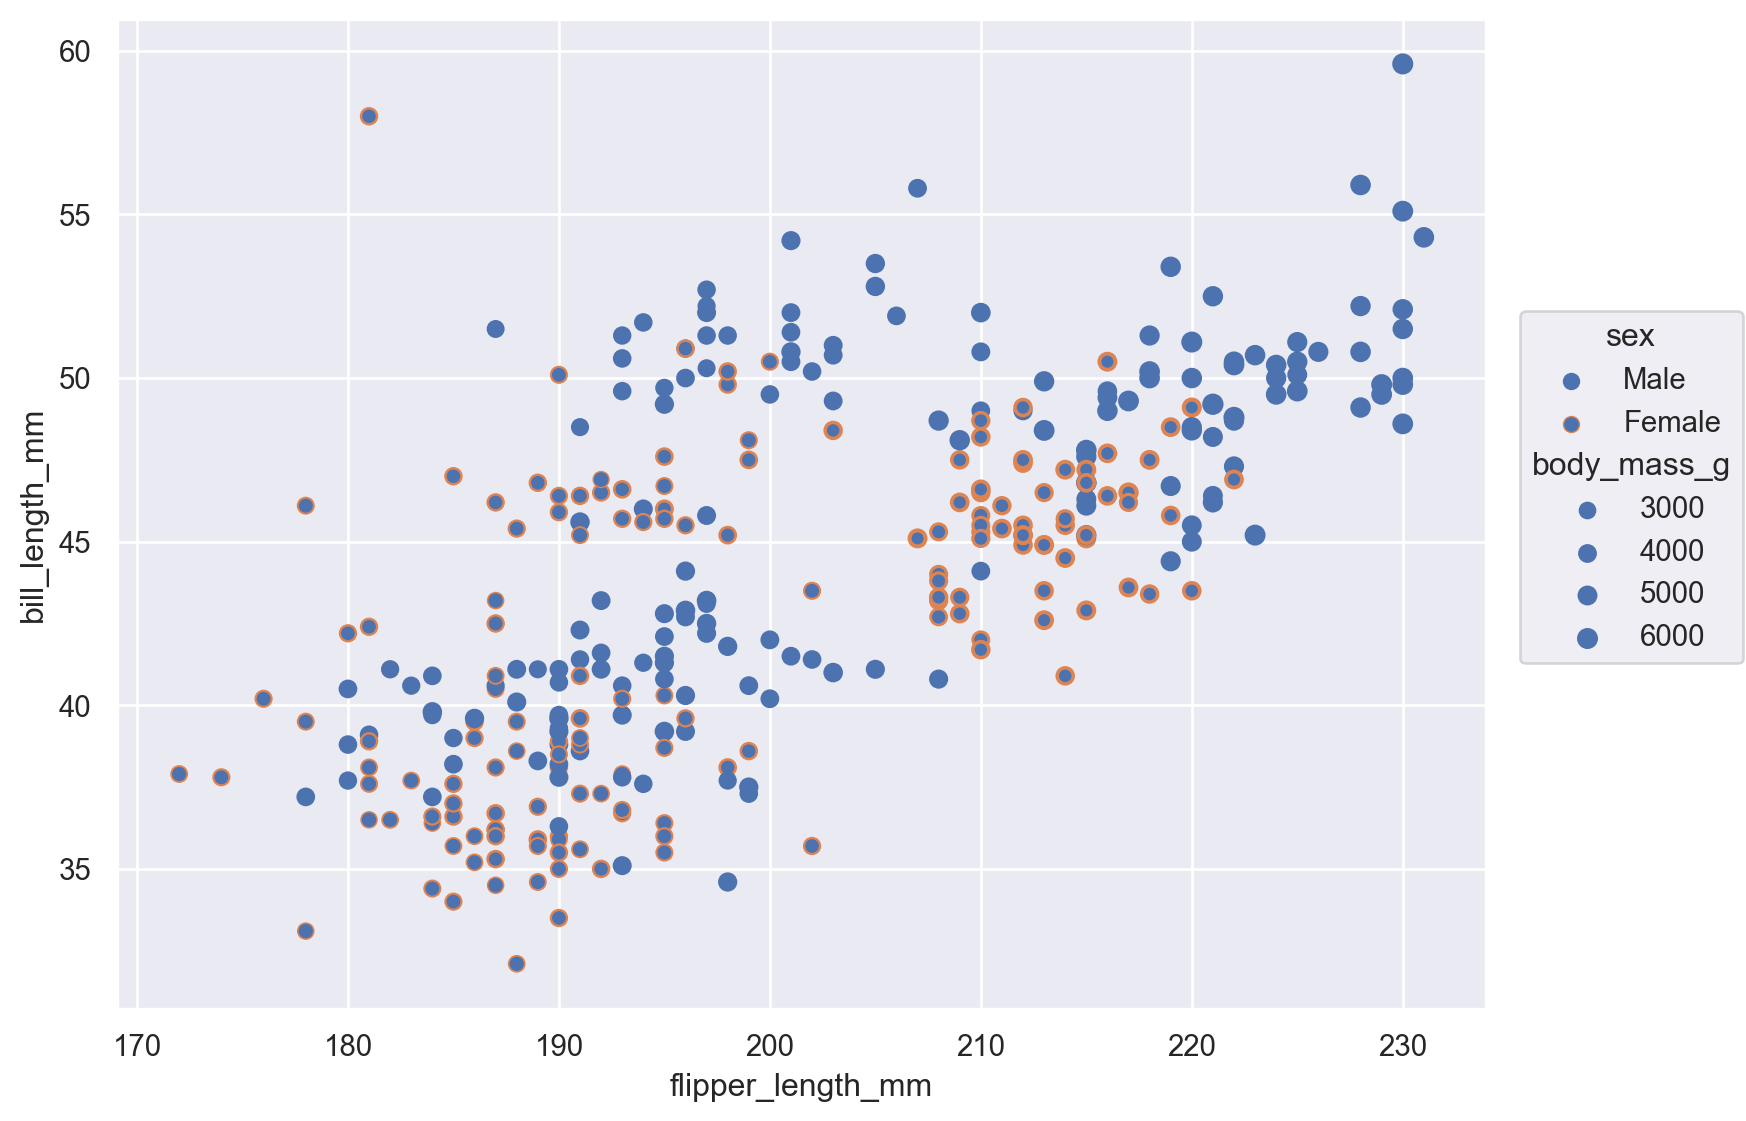

In [31]:
(so.Plot(data=penguins, x="flipper_length_mm", y="bill_length_mm",edgecolor="sex", edgewidth="body_mass_g")
 .add(so.Dot())
 .layout(size=(8,6),engine="tight")
 # .facet(['TST'])
)

# set

In [ ]:
sns.set(style="darkgrid")